In [ ]:
import unicodedata
import io

file_path = "/home/noernova/Labs/tesstrain/data/shn-ground-truth/1729612954.13547.gt.txt"
with io.open(file_path, 'r', encoding='utf-8') as f:
    try:
        text = f.read()
        print(text)
    except UnicodeDecodeError as e:
        print(e)

In [ ]:
normalized_text = unicodedata.normalize('NFKD', text)
print(normalized_text)

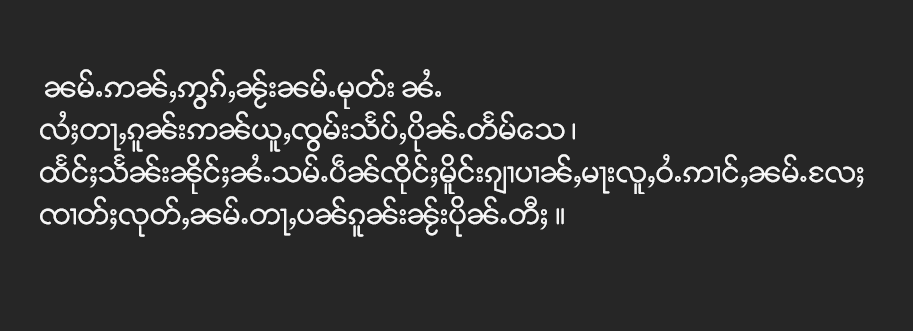

ၼမ်ႉဢၼ်ႇဢွၵ်ႇၼႂ်းၼမ်ႉမုတ်းၼႆႉ လႆႈတႃႇၵူၼ်းဢၼ်ယူႇၸွမ်းသႅပ်ႇပိုၼ်ႉတႅမ်သေ၊ ထႅင်ႈသႅၼ်းၼိုင်ႈၼႆႉသမ်ႉပဵၼ်ၸိုင်ႈမိူင်းၵျႃပၢၼ်ႇမႃးလူႇဝႆႉဢၢင်ႇၼမ်ႉလႄႈ ၸၢတ်ႈလုတ်ႇၼမ်ႉတႃႇပၼ်ၵူၼ်းၼႂ်းၵိုၼ်ႉတီႈ။
miss_percentage: 2%
miss_target: ['ပိုၼ်ႉ']
miss_result: ['ၵိုၼ်ႉ']


In [6]:
import pytesseract
from PIL import Image
from shannlp import syllable_tokenize
import re

def compare_arrays(target, result):
    miss_target = []
    miss_result = []
    max_length = max(len(target), len(result))
    
    for i in range(max_length):
        target_word = target[i] if i < len(target) else None
        result_word = result[i] if i < len(result) else None
        
        if target_word != result_word:
            if target_word is not None:
                miss_target.append(target_word)
            if result_word is not None:
                miss_result.append(result_word)
    
    total_items = max(len(target), len(result))
    miss_count = len(miss_target)
    miss_percentage = (miss_count / total_items) * 100
    
    return {
        "miss_percentage": "All Same! 100%" if miss_percentage == 0 else f"{miss_percentage:.0f}%",
        "miss_target": miss_target,
        "miss_result": miss_result
    }

# target_text = "မၼ်းပဵၼ်ပွၵ်ႈၵမ်းဢွၼ်တၢင်းသုတ်း ၶဝ်လႆႈၺႃးၵၼ် ပေႃးမႃးၺႃးၵၼ်ၼႆၵေႃႈ ၶဝ်ဝႃႈ ႁဝ်းလူဝ်ႇလႆႈႁူမ်ႈၵၼ် ယွၼ်းသုၼ်ႇလႆႈႁဝ်းၶိုၼ်းယဝ်ႉ ။ ယွၼ်းၽႂ်ယွၼ်းမၼ်းတႄႉဢမ်ႇလႆႈယဝ်ႉ - ႁဵတ်းၼၼ်သေယဝ်ႉ ၶဝ်ၸဝ်ႈ လႆႈ ၸႂ်ၵၼ်သေ ထိုင်မႃး 1946 ၸင်ႇမႃးတႄႇတင်ႈ ၶွင်ႇသီႇၸိုင်ႈတႆး ။ မိူဝ်ႈဢွၼ်တၢင်းတႄႉ ႁွင်ႉဝႃႈ ၶွင်ႇသီႇၸဝ်ႈၾႃႉၸိုင်ႈတႆး။ ဝၢႆးၼႆႉမႃး ပေႃးဝႃႈၶွင်ႇသီႇၸဝ်ႈၾႃႉၸိုင်ႈတႆးၼႆ မၼ်း ၵႅပ်ႈၼႃႇပူၼ်ႉတီႈ ယွၼ်ႉပိူဝ်ႈဝႃႈ ႁဝ်းလူဝ်ႇလႆႈပႃး ၵူၼ်းမိူင်းႁဵတ်းသၢင်ႈၸွမ်း ၸင်ႇတေဢွင်ႇ။ ပေႃးႁဝ်းတေႁွင်ႉၶွင်ႇသီႇၸဝ်ႈၾႃႉၸိုင်ႈတႆးၼႆ တေဢမ်ႇသၢင်ႇထုင်ႇလႄႈ ၸင်ႇမႃးပဵၼ်ထွင်ႇသီႇၸိုင်ႈတႆး ။"
target_text = " ၼမ်ႉဢၼ်ႇဢွၵ်ႇၼႂ်းၼမ်ႉမုတ်း ၼႆႉ လႆႈတႃႇၵူၼ်းဢၼ်ယူႇၸွမ်းသႅပ်ႇပိုၼ်ႉတႅမ်သေ ၊ ထႅင်ႈသႅၼ်းၼိုင်ႈၼႆႉသမ်ႉပဵၼ်ၸိုင်ႈမိူင်းၵျႃပၢၼ်ႇမႃးလူႇဝႆႉဢၢင်ႇၼမ်ႉလႄႈ ၸၢတ်ႈလုတ်ႇၼမ်ႉတႃႇပၼ်ၵူၼ်းၼႂ်းပိုၼ်ႉတီႈ ။"
# target_text = "တီႈဝဵင်းသီႇသႅင်ႇၼႆႉ ၾႆးၾႃႉ မႃး 4 – 5 ၸူဝ်ႈမူင်းၵူၺ်း ။ ၶၢဝ်းယၢမ်းၾႆးမႃးဢမ်ႇမၢၼ်ႇမႅၼ်ႈလႄႈ ၵူၼ်းပိုၼ်ႉတီႈပဵၼ်ဢၼ်ၵိၼ်းၸႂ် ။ ပေႃးၼမ်ႉဢမ်ႇၵုမ်ႇထူၼ်ႈၸိူင်ႉၼႆ ၸၢင်ႈပဵၼ်တင်းပဵၼ် တႃၸဵပ်းတႃၵႅၼ်း ၊ ၶူမ်းၵၢႆး ၊ လူမ်းမႆႈၶမ် ၸိူဝ်းၼႆႉ- ၵူၼ်းပိုၼ်ႉတီႈလၢတ်ႈ ။"
target_text = re.sub(r'\s+', ' ', target_text).strip()
target_token = syllable_tokenize(target_text)

oem_psm_config = r'--oem 1 --psm 6'

image_path = "data/demo/testimage16.png"
image = Image.open(image_path)

extracted_text = pytesseract.image_to_string(image, lang="shn", config=oem_psm_config)  # Assuming the text is in Burmese
extracted_text = re.sub(r'\s+', ' ', extracted_text).strip()
extracted_token = syllable_tokenize(extracted_text)

display(image)
print(extracted_text)
compare_percentage = compare_arrays(target_token, extracted_token)

for key, value in compare_percentage.items():
    print(f"{key}: {value}")



In [101]:
original_text = """ပပ်ႉဢွၼ်ႇၵႂၢမ်းတႅတ်ႈတႆးၼႆႉ ၼင်ႇႁိုဝ်လုၵ်ႈဢွၼ်ႇတႆးႁဝ်း ၵူႈၵေႃႉပေႃးတေလူင်ႉလႅၼ်ႇၸႂ်ႉတိုဝ်းသၵ်းၵႂၢမ်းဝေႃးႁႃႇရတႆး လႆႈၸႅတ်းၸႅတ်ႈၼၼ်ႉလႄႈသင် ၼင်ႇႁိုဝ်ပေႃးတေပဵၼ် ပုၼ်ႈတႃႇၵမ်ႉထႅမ်ၼႂ်းပၢင်သွၼ်လႄႈသင် ၼင်ႇႁိုဝ်လိၵ်ႈတႆးပေႃးတေႁူမ်ႈတူဝ် ၵႂၢမ်းတႆးပေႃးတေႁူမ်ႈၶေႃႈၼၼ်ႉ ဢိင်ဢဝ်တီႈပပ်ႉၵႅမ်မိုဝ်းမေႃသွၼ်ၸုမ်းပွင်ၵၢၼ် မ ႁႃႈတူဝ်လိၵ်ႈတႆးၸၼ်ႉၸွမ်တင်းလူင် ပိုၼ်ဢွၵ်ႇမႃးၼၼ်ႉသေ ၵေႃလိၵ်ႈလၢႆးလႄႈၾိင်ႈငႄႈတႆး ၸၼ်ႉၸွမ်တင်းလူင်မိူင်းမၢၼ်ႈမူၼ်ႉမႄးဢိတ်ႇဢွၵ်ႇမိူဝ်ႈပီ 1997 ၼီႈ လိူၼ်ၽေႇၽေႃႇဝႃႇရီႇၼၼ်ႉ ႁႂ်ႈပေႃးလႆႈသိုပ်ႇယိပ်းတိုဝ်းၽႄႈတိူၼ်းၵႂႃႇ ၼႂ်းပၢင်သွၼ်လိၵ်ႈတင်းၼမ်ၼႂ်းမိူဝ်ႈလုၵ်ႈဢွၼ်ႇ ၸၢဝ်းၶိူဝ်းတႆးႁဝ်းၵူႈၵေႃႉလႄႈ၊ ၵေႃလိၵ်ႈလႆးလႄႈၾိင်ႈငႄႈတႆး ဝဵင်းပၢင်လူင် ၸင်ႇသိုပ်ႇဢိတ်ႇဢွၵ်ႇထႅင်ႈမိူဝ်ႈပီ 2022 ၼီႈ၊ လိူၼ်ၽေႇၽေႃႇဝႃႇရီႇၼၼ်ႉဢေႃႈ။"""

new_text = """
ပပ်ႉဢွၼ်ႇၵႂၢမ်းတႅတ်ႈတီးၼီႉ ၼင်ႇႁိုဝ်လုၵ်ႈဢွၼ်ႇတႆးႁဝ်း 
ၵူႈၵေႃႉပေႃးတေလူင်ႉလႅၼ်ႇၸႂ်ႉတိုဝ်းသပ်းၵႂၢမ်းဝေႃးႁႃႇရတီး လႆး 
ၸႅတ်းၸႅတ်ႈၼၼ်ႉလႄႈသင် ၼင်ႇႁိုဝ်ပေႃးတေပဵၼ် ပုၼ်ႈတႃႇၵမ်ႉ 
ထႅမ်ၼႂ်းပၢင်သွၼ်လႈသင် 
ၼင်ႇႁိုဝ်လိဝ်ႈတႆးပေႃးတေႁူမ်ႈတူဝ် 
ဝႂၢမ်းတႆးပေႃးတေႁူမ်ႈၶေႃႈၼၼ်ႉ ဢိင်ဢဝ်တီႈပပ်ႉၵႅမ်မိုဝ်းမေႃသွၼ် 
ၸုမ်းပွင်ၵၢၼ်မႃႁႃႈတူဝ်လိၵ်ႈတႆးၸၼ်ႉၸွမ်တင်းလူင် ပိုၼ်ဢွၵ်ႇမႃး 
ၼၼ်ႉသေ ၵေႃလိၵ်ႈလၢႆးလႄႈၾိင်ႈငႄႈတီး ၸၼ်ႉၸွမ်တင်းလူင် 
မိူင်းမၢၼ်ႈမူၼ်ႉမႄးဢိတ်ႇဢွၵ်ႇမိူဝ်ႈပီ 1997 ၼီႈ လိူၼ်ၽေႇၽေႃႉ 
ဝႃႇရီႇၼၼ်ႉ 
ႁႂ်ႈပေႃးလႆႈသိုပ်ႇယိပ်းတိုဝ်းၼႄႈတိူၼ်းၵႂႃႇ 
ၼႂ်းပၢင် 
သွၼ်လိၵ်ႈတင်းၼမ်ၼႂ်းမိူဝ်ႈလုပ်ႈဢွၼ်ႇ ၸၢဝ်ႈၶိူဝ်းတႆးႁဝ်းၵူႈၵေႃႉ 
လႄႈ၊ ၵေႃလိၵ်ႈလီးလႄႈၾိင်ႈငႄႈတီး ဝဵင်းပၢင်လူင် ၸင်ႇသိုပ်ႇ 
ဢိတ်ႇဢွၵ်ႇထႅင်ႈမိူဝ်ႈပီ 2022 ၼီႈ၊ လိူၼ်ၽေႇၽေႃႇဝႃႇရီႇၼၼ်ႉ 
ဢေႃႈ၊ 
"""

old_text = re.sub(r'\s+', ' ', original_text).strip()
new_text = re.sub(r'\s+', ' ', new_text).strip()

old_text_token = syllable_tokenize(old_text)
new_text_token = syllable_tokenize(new_text)

compare_percentage = compare_arrays(old_text_token, new_text_token)

for key, value in compare_percentage.items():
    print(f"{key}: {value}")

miss_percentage: 10%
miss_target: ['တႆး', 'ၼႆႉ', 'သၵ်း', 'တႆး', 'လႆႈ', 'လႄႈ', 'လိၵ်ႈ', 'ၵႂၢမ်း', 'မ', 'တႆး', 'ၽေႃႇ', 'ၽႄႈ', 'လုၵ်ႈ', 'ၸၢဝ်း', 'လႆး', 'တႆး', '။']
miss_result: ['တီး', 'ၼီႉ', 'သပ်း', 'တီး', 'လႆး', 'လႈ', 'လိဝ်ႈ', 'ဝႂၢမ်း', 'မႃ', 'တီး', 'ၽေႃႉ', 'ၼႄႈ', 'လုပ်ႈ', 'ၸၢဝ်ႈ', 'လီး', 'တီး', '၊']
